# Open AI: Image Processing

Under construction....

In [1]:
from openai import  OpenAI
from dotenv import load_dotenv

In [2]:
load_dotenv('/Users/alvinchen/.env')

True

## Image Processing

![](https://images.unsplash.com/photo-1503454537195-1dcabb73ffb9?q=80&w=2848&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D)

In [15]:

client = OpenAI()

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "What’s in this image?"},
                {
                    "type": "image_url",
                    "image_url": {
                        "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/2560px-Gfp-wisconsin-madison-the-nature-boardwalk.jpg",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason=None, index=0, message=ChatCompletionMessage(content='The image depicts a scenic natural landscape featuring a wooden boardwalk meandering through a lush green wetland or grassy area. The boardwalk extends into the distance, inviting exploration. On both sides of the walkway, tall grasses are visible, suggesting a natural reserve or park designed for walking and experiencing the natural environment up close. The sky above is partly cloudy with soft blue hues and some scattered white clouds, further enhancing the serene and picturesque setting of the scene.', role='assistant', function_call=None, tool_calls=None), finish_details={'type': 'stop', 'stop': '<|fim_suffix|>'})


## Video Processing

In [6]:
from IPython.display import display, Image, Audio

import cv2  # We're using OpenCV to read video
import base64
import time
import openai
import os
import requests

In [7]:
video = cv2.VideoCapture("/Users/alvinchen/Downloads/video-test.mp4")

base64Frames = []
while video.isOpened():
    success, frame = video.read()
    if not success:
        break
    _, buffer = cv2.imencode(".jpg", frame)
    base64Frames.append(base64.b64encode(buffer).decode("utf-8"))

video.release()
print(len(base64Frames), "frames read.")

385 frames read.


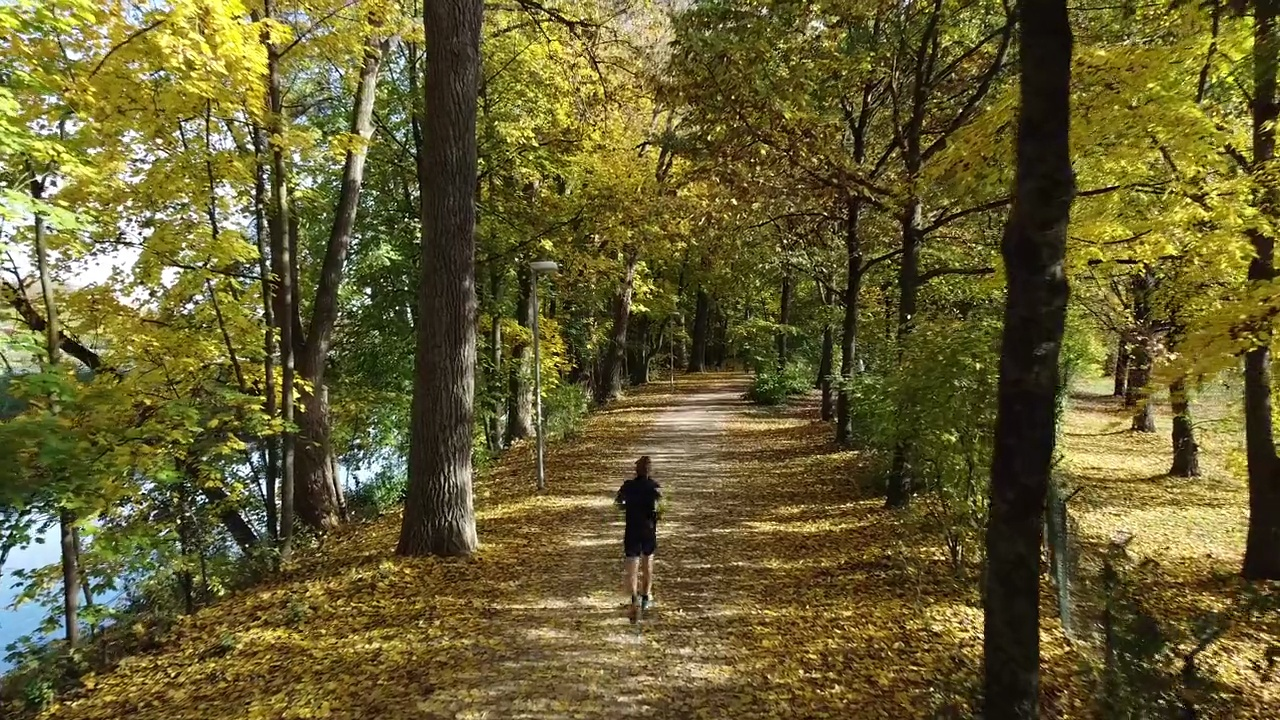

In [28]:
display_handle = display(None, display_id=True)
for img in base64Frames[:10]:
    display_handle.update(Image(data=base64.b64decode(img.encode("utf-8"))))
    time.sleep(0.025)

In [29]:
type(base64Frames)
base64Frames[0]
len(base64Frames)

385

In [30]:

response = client.chat.completions.create(
    model="gpt-4-vision-preview",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "What are in these images? Is there any difference between them?",
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64Frames[10]}",
                    },
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64Frames[20]}",
                    },
                },
            ],
        }
    ],
    max_tokens=300,
)
print(response.choices[0].message.content)

The images depict a serene wooded path with golden autumn leaves on the ground and trees with yellowing foliage, suggesting it is the fall season. There is also a person in a hoodie and shorts walking down the path in both pictures.

There is a slight difference between the two images – in the second image, the person is a bit farther along the path compared to their position in the first image. Additionally, there might be minor differences in the shadows and lighting due to the movement of the person and possibly small changes in the natural lighting. However, without analyzing the pictures on a pixel level or having access to metadata, the main difference visible is the position of the person walking on the path.


In [22]:
map(lambda x: {"image": x, "resize": 768}, base64Frames[::5])

In [26]:
## Not sure if it is working...

PROMPT_MESSAGES = [
    {
        "role": "user",
        "content": [
            { 
             "type": "text",
             "text": "These are frames from a video that I want to upload. Generate a compelling description that I can upload along with the video.",  
            },
            {
                "type": "image_url",
                "image_url": {
                        "url": f"data:image/jpeg;base64,{base64Frames[20:25]}",
                    },
            }
        ],
    },
]

params = {
    "model": "gpt-4-vision-preview",
    "messages": PROMPT_MESSAGES,
    "max_tokens": 100,
}

result = client.chat.completions.create(**params)
print(result.choices[0].message.content)

"Embrace the serene beauty of autumn in this peaceful walk through a forest bathed in golden hues. Listen to the rustling leaves and watch as nature prepares for the embrace of winter. Join our journey through this tranquil landscape and let the quietude of this woodland retreat calm the mind and refresh the spirit. Don't forget to like, share, and subscribe for more soul-soothing scenic adventures!"
